In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 스케일링 데이터

In [2]:
df1 = pd.read_csv('./스케일링/X_test_robust.csv',encoding='utf-8',index_col=0)
df1= df1.append(pd.read_csv('./스케일링/X_train_robust.csv',encoding='utf-8',index_col=0))
df = df1.sort_index()
df

,Webtoon code,Subscribers,Grade,Amount,Total Likes,SJ,GH,ML,KA,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
0,A1,0.612553,0.821192,0.195121,0.564897,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,A2,0.079814,0.887417,0.501505,0.803013,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,A3,0.257394,0.980132,0.419338,0.246688,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,A4,0.015240,0.953642,0.650720,0.099489,0,1,0,0,0,1,1,0,0,0,0,0,0,0
4,A5,0.305825,0.933775,0.613488,0.311628,1,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,A234,0.000533,0.562914,0.218009,0.000564,0,1,0,0,0,0,0,1,0,0,0,1,0,0
234,A235,0.004698,0.761589,0.246978,0.032383,0,1,0,0,0,0,0,0,0,0,0,0,0,1
235,A236,0.007232,0.337748,0.000000,0.000496,0,0,1,0,0,0,0,0,0,0,0,0,1,0
236,A237,0.011704,0.370861,0.092773,0.047536,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [3]:
df['Class']=4
df.loc[:60,'Class']=1
df.loc[60:120,'Class']=2
df.loc[60:180,'Class']=3

In [4]:
from sklearn.model_selection import train_test_split
header = []
for i in df:
    header.append(i)

    x = df[header[1:-1]]
    y = df[header[-1]]  #데이터셋 분류: x=input variable, y=output variable

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, shuffle=42, random_state=42)  #데이터셋 학습용/테스트용 나눔

# 로지스틱회귀 다중분류

In [5]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
model = LogisticRegression() 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 

print('\n 테스트 정확도 :', model.score(X_test, y_test))  

logist = model.score(X_test, y_test)

[분류 결과] 
 [3 1 3 4 1 3 3 3 3 4 4 3 1 4 1 3 3 3 3 3 3 4 3 4 1 3 3 3 3 1 3 3 3 3 3 3 3
 4 3 3 3 3 1 3 1 3 3 3 3 3 4 3 3 3 3 1 4 4 3 3]

 테스트 정확도 : 0.6333333333333333


In [6]:
for n in range(len(X_test.columns)):
    print(X_test.columns[n],'계수:', round(model.coef_[0][n],9) )

Subscribers 계수: 1.605754373
Grade 계수: 1.482576796
Amount 계수: 1.113746264
Total Likes 계수: 1.059653699
SJ 계수: 0.458457965
GH 계수: -0.096063257
ML 계수: -0.297706102
KA 계수: -0.066646556
Sci-fi 계수: -0.945102196
Drama 계수: 0.273125258
Romance 계수: 0.965117891
Superhero 계수: -0.044372123
Supernatural 계수: 0.380232668
Slice of life 계수: -0.371186387
Thriller 계수: 0.388710725
Action 계수: -0.497576645
Comedy 계수: -0.606376983
Fantasy 계수: 0.086777579


## Confusion Matrix & Performances

[[ 6  7  0]
 [ 2 25  3]
 [ 1  9  7]]


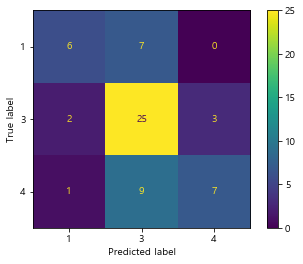

In [7]:
# result = []
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_true = list(y_test)
y_pred = model.predict(X_test)
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, X_test, y_test)  


## 스페인어 데이터로 예측

In [8]:
df_sp= pd.read_excel('./data/Spanish2.xlsx')
df_sp =df_sp.sort_values(by='Comments Likes',ascending=False)
lists = list(df.columns)
df_test = pd.DataFrame()
for i in lists[1:-1]:
    try:
        df_test[i] = df_sp[i]
    except:
        df_test[i] = 0
        pass
df_test

,Subscribers,Grade,Amount,Total Likes,SJ,GH,ML,KA,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
1,15000000,9.88,130956,131000000,1,0,0,0,0,1,1,0,0,0,0,0,0,0
0,23000000,9.81,148192,204000000,0,1,0,0,0,1,1,0,0,0,0,0,0,0
16,11000000,9.88,94098,39000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5,14000000,9.81,119533,79000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0
18,7646000,9.77,83472,35000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,931000,9.44,34226,220188,0,0,1,0,0,0,0,0,0,0,0,1,0,1
77,789000,9.59,91900,306304,0,1,0,0,0,0,0,0,0,0,0,1,0,0
85,73000,9.45,111555,206754,0,0,0,1,0,0,0,0,0,0,1,0,0,0
101,173000,9.46,84887,7720,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [9]:
# df_test = df_test.sort_values(by='Comments Likes',ascending=False)

header=[]
for i in df_test:
    header.append(i)
xx_test = df_test[header[:]]

xx_test

,Subscribers,Grade,Amount,Total Likes,SJ,GH,ML,KA,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
1,15000000,9.88,130956,131000000,1,0,0,0,0,1,1,0,0,0,0,0,0,0
0,23000000,9.81,148192,204000000,0,1,0,0,0,1,1,0,0,0,0,0,0,0
16,11000000,9.88,94098,39000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5,14000000,9.81,119533,79000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0
18,7646000,9.77,83472,35000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,931000,9.44,34226,220188,0,0,1,0,0,0,0,0,0,0,0,1,0,1
77,789000,9.59,91900,306304,0,1,0,0,0,0,0,0,0,0,0,1,0,0
85,73000,9.45,111555,206754,0,0,0,1,0,0,0,0,0,0,1,0,0,0
101,173000,9.46,84887,7720,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [10]:
df_test['Class']=4
df_test.loc[:20,'Class']=1
df_test.loc[20:55,'Class']=2
df_test.loc[55:80,'Class']=3

In [11]:
print('[분류 결과] \n', model.predict(df_test[df_test.columns[:-1]])) 
print('\n [테스트 정확도] :', model.score(df_test[df_test.columns[:-1]],df_test[df_test.columns[-1]]))  

[분류 결과] 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 [테스트 정확도] : 0.5882352941176471


# 2. 여러가지 분류 모델


## KNN 

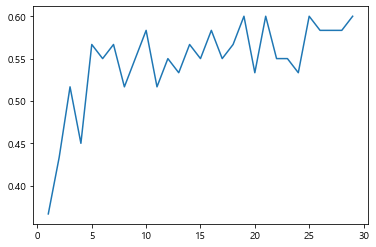

In [12]:
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=4)
#model.fit(X_train, y_train)  
#print('[분류 결과] \n', model.predict(X_test)) 
k = 30
scores = []
for i in range(1,k):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #print('\n [테스트 정확도] :', score)  
    scores.append(score)
# print(model.predict_proba(X_test))
plt.plot([i for i in range(1,k)], scores)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  
# model.predict(xx_test)
knn = model.score(X_test, y_test)

[분류 결과] 
 [3 1 3 3 3 3 3 3 3 3 3 3 3 4 3 3 1 3 3 3 3 4 4 3 1 3 3 3 3 1 3 3 3 3 3 3 3
 4 3 1 3 3 1 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3]

 [테스트 정확도] : 0.55


## RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  

RF = model.score(X_test, y_test)
# print('스페인어 분류 예측:', model.predict(xx_test))

[분류 결과] 
 [3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 4 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3]

 [테스트 정확도] : 0.55


## SVM - SVC

In [15]:
from sklearn.svm import SVC #Ridge
model = SVC(random_state=42)
 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 

print('\n 테스트 정확도 :', model.score(X_test, y_test))  

SVM= model.score(X_test, y_test)
# print('스페인어 분류 예측:', model.predict(xx_test))

[분류 결과] 
 [3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

 테스트 정확도 : 0.55


## DecisionTree

In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 

print('\n 테스트 정확도 :', model.score(X_test, y_test))  

DT =model.score(X_test, y_test)
# print('스페인어 분류 예측:', model.predict(xx_test))

[분류 결과] 
 [1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 1 3 4 3 3 1 3 4 1 3 3 4 3 3 1 1 3 1
 4 3 1 3 1 3 3 3 4 1 3 4 3 3 4 4 3 1 3 4 3 1 1]

 테스트 정확도 : 0.4166666666666667


[Text(484.1868932038835, 1302.375, 'X[0] <= 0.038\ngini = 0.618\nsamples = 178\nvalue = [47, 91, 40]\nclass = 2등급'),
 Text(130.01941747572818, 1189.125, 'X[2] <= 0.249\ngini = 0.566\nsamples = 67\nvalue = [5, 32, 30]\nclass = 2등급'),
 Text(43.33980582524272, 1075.875, 'X[2] <= 0.054\ngini = 0.245\nsamples = 21\nvalue = [0, 3, 18]\nclass = 3등급'),
 Text(21.66990291262136, 962.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 2등급'),
 Text(65.00970873786409, 962.625, 'X[1] <= 0.897\ngini = 0.18\nsamples = 20\nvalue = [0, 2, 18]\nclass = 3등급'),
 Text(43.33980582524272, 849.375, 'X[4] <= 0.5\ngini = 0.1\nsamples = 19\nvalue = [0, 1, 18]\nclass = 3등급'),
 Text(21.66990291262136, 736.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]\nclass = 3등급'),
 Text(65.00970873786409, 736.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 2등급'),
 Text(86.67961165048544, 849.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 2등급'),
 Text(216.6990291262136, 1075.875, 'X[1] <= 0.526\ngin

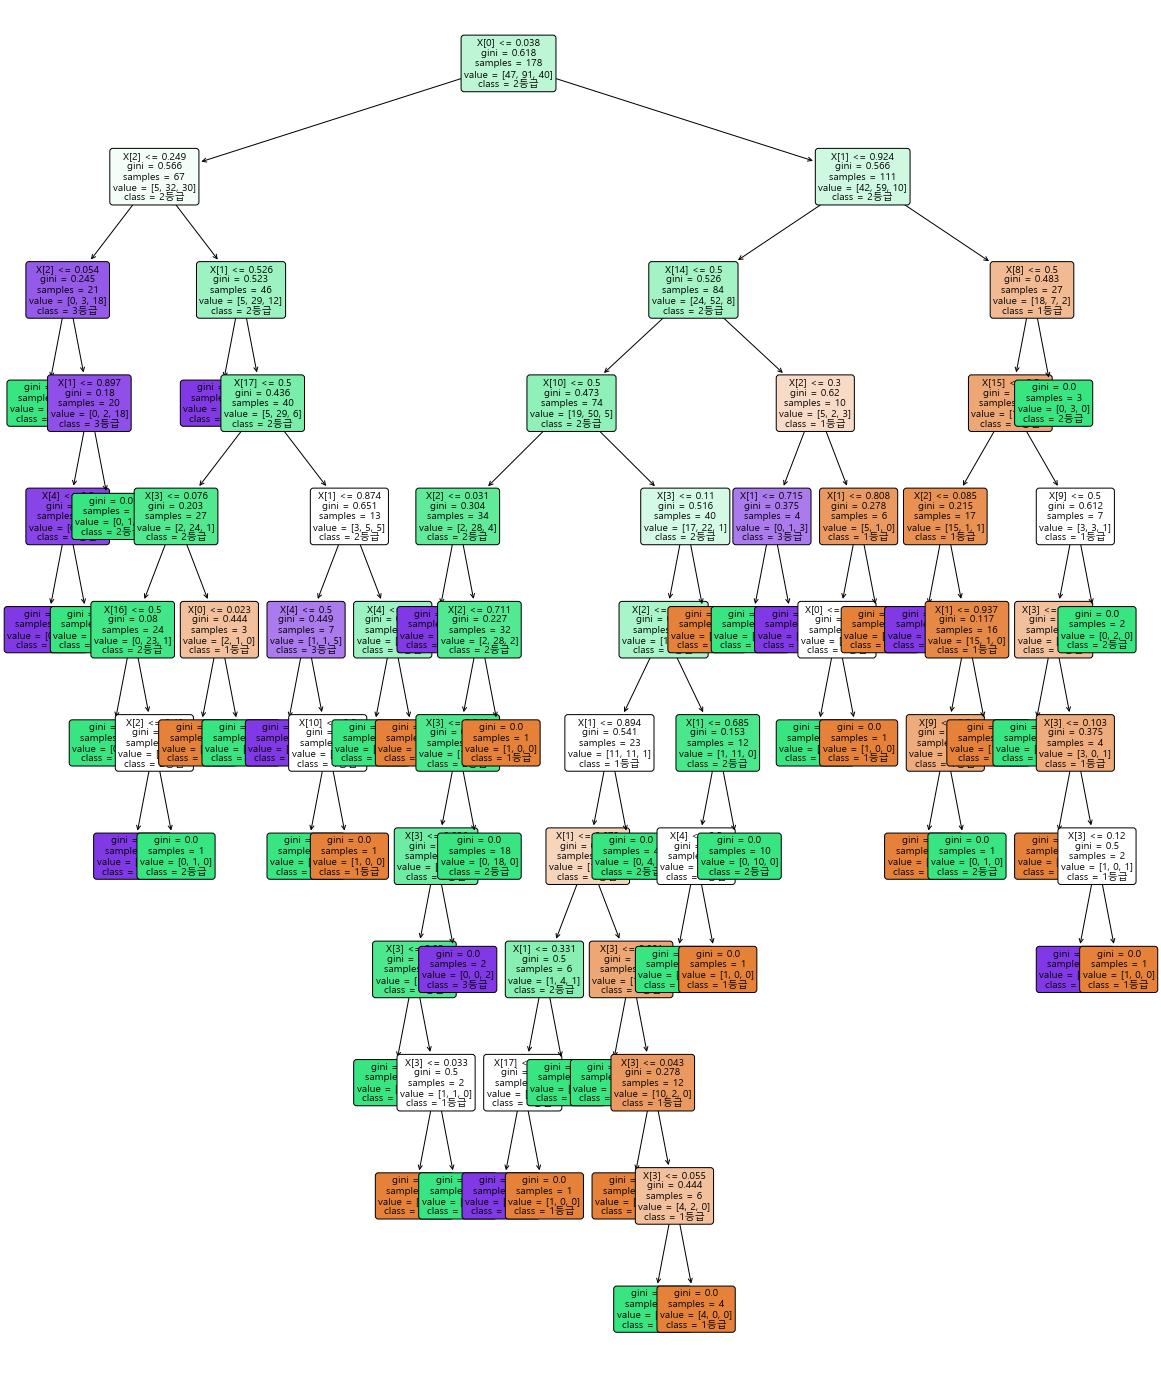

In [17]:
plt.figure(figsize=(20, 25))
tree.plot_tree(model,
               class_names=['1등급','2등급','3등급','4등급'],
               filled=True,
               rounded=True,
               fontsize=10)

## Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 60 points : 38


In [19]:
print('[분류 결과] \n',gnb.predict(X_test))
print('\n 테스트 정확도 :', gnb.score(X_test, y_test))  

GNB = gnb.score(X_test, y_test)
# print('스페인어 분류 예측:', model.predict(xx_test))

[분류 결과] 
 [1 1 1 1 1 4 3 4 1 4 4 4 1 4 1 1 1 4 3 1 1 4 1 4 1 1 4 4 1 1 4 1 4 1 1 1 1
 4 4 1 4 1 1 1 1 1 3 4 4 1 4 1 1 1 1 1 4 4 1 1]

 테스트 정확도 : 0.36666666666666664


# Models Evaluation 

In [20]:
model_score=[logist,knn,RF, SVM,DT,GNB]
models= ['Logistic','KNN','Random Forest','SVM','Decision Tree','GNB']
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])

,Accuracy
Logistic,0.633333
KNN,0.550000
Random Forest,0.550000
SVM,0.550000
Decision Tree,0.416667
GNB,0.366667


<BarContainer object of 6 artists>

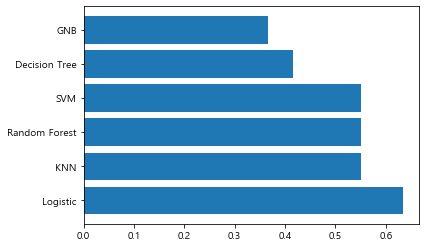

In [21]:
plt.barh(models,model_score)

로지스틱 회귀 분류 모델이 0.63으로 가장 높은 정확도를 가진다.  
데이터가 부족함에 따라 낮은 정확도가 나오는 것으로 판단이 된다.  